In [84]:
import pandas as pd
import numpy as np
import time
from sklearn.impute import SimpleImputer


In [85]:
data = pd.read_csv('data/zoonosis_dataset_full.csv')

#### Data pre-processing

#### Visualize heatmap for correlation and drop highly correlated features as in practical exercise I


In [86]:
data1 = pd.DataFrame.copy(data)
# data1.drop(['gid', 
#             'subtype',
#             'label',
#             'src'], axis=1, inplace=True)
data1_ = data1.loc[:,(data1!=0).any(axis=0)]
corrmatrix = data1_.corr(numeric_only=True)

In [87]:
corrmatrix.head()

,TT_p2_Bias_HA,V_aa_Bias_HA,GGC_Bias_HA,AG_Bias_HA,CT_Bias_HA,ATA_Bias_HA,GG_p1_Bias_HA,G_Bias_HA,GA_p1_Bias_HA,A_Bias_HA,...,PAAC_Xc1.L_PB2,PAAC_Xc1.A_PB2,PAAC_Xc1.P_PB2,PAAC_Xc2.lambda3_PB2,PAAC_Xc1.F_PB2,PAAC_Xc1.C_PB2,PAAC_Xc1.I_PB2,PAAC_Xc1.W_PB2,PAAC_Xc1.R_PB2,PAAC_Xc1.H_PB2
TT_p2_Bias_HA,1.000000,0.033501,-0.020122,0.085947,-0.225044,-0.296177,-0.317045,0.130810,0.142579,-0.235783,...,-0.054508,0.013258,-0.054968,0.112929,-0.054959,-0.010397,-0.052938,-0.025831,0.076750,-0.043338
V_aa_Bias_HA,0.033501,1.000000,0.130224,-0.228245,-0.007940,-0.173006,-0.410107,-0.158081,0.017504,0.012478,...,0.032851,-0.020412,0.032951,-0.039131,0.032900,0.026322,0.034042,0.017771,0.000768,-0.045977
GGC_Bias_HA,-0.020122,0.130224,1.000000,-0.164258,0.157692,-0.441133,0.254086,0.117563,-0.315574,-0.443027,...,-0.094131,-0.074194,-0.093214,0.151112,-0.093448,-0.033935,-0.093476,-0.085762,0.073489,-0.141113
AG_Bias_HA,0.085947,-0.228245,-0.164258,1.000000,0.081191,0.071141,-0.272699,0.078902,0.185137,-0.175061,...,0.053349,0.074986,0.053335,-0.053274,0.053010,0.006943,0.052049,0.034633,0.029012,0.061516
CT_Bias_HA,-0.225044,-0.007940,0.157692,0.081191,1.000000,0.041057,0.133938,0.248622,-0.309992,-0.283248,...,-0.017463,-0.015114,-0.016644,0.004233,-0.017253,-0.018377,-0.017946,-0.030907,-0.025684,-0.070570


In [88]:
highlycorr = (corrmatrix > 0.9).sum()
corr_counts = highlycorr.loc[highlycorr > 1]
print(corr_counts)
highest_corr = highlycorr.idxmax()
highest_corr



CTDC_hydrophobicity_ENGD860101.G3_HA    115
CTDC_polarity.G2_HA                       3
CTDC_normwaalsvolume.G1_HA                3
CTDC_hydrophobicity_CASG920101.G3_HA    112
CTDC_hydrophobicity_ZIMJ680101.G1_HA      4
                                       ... 
PAAC_Xc1.L_PB2                          122
PAAC_Xc1.P_PB2                          122
PAAC_Xc2.lambda3_PB2                     45
PAAC_Xc1.F_PB2                          122
PAAC_Xc1.I_PB2                          122
Length: 234, dtype: int64


'PAAC_Xc1.E_M1'

In [89]:
# columns_to_drop = set(corrmatrix[highest_corr].loc[corrmatrix[highest_corr] > 0.9].index)
# columns_to_drop.remove(highest_corr)
# data1_.drop(columns_to_drop, axis=1, inplace=True)

In [90]:
while len(corr_counts) > 0:
    columns_to_drop = set(corrmatrix[highest_corr].loc[corrmatrix[highest_corr] > 0.9].index)
    columns_to_drop.remove(highest_corr)
    data1_.drop(columns_to_drop, axis=1, inplace=True)
    corrmatrix = data1_.corr(numeric_only=True)
    highlycorr = (corrmatrix > 0.9).sum()
    corr_counts = highlycorr.loc[highlycorr > 1]
    highest_corr = highlycorr.idxmax()
    print(len(corr_counts), data1_.shape)

/var/folders/xy/wvlsxjjn1px0ql5dll2npm300000gs/T/ipykernel_55858/2368768996.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data1_.drop(columns_to_drop, axis=1, inplace=True)


106 (19531, 830)


/var/folders/xy/wvlsxjjn1px0ql5dll2npm300000gs/T/ipykernel_55858/2368768996.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data1_.drop(columns_to_drop, axis=1, inplace=True)


30 (19531, 761)


/var/folders/xy/wvlsxjjn1px0ql5dll2npm300000gs/T/ipykernel_55858/2368768996.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data1_.drop(columns_to_drop, axis=1, inplace=True)


26 (19531, 758)


/var/folders/xy/wvlsxjjn1px0ql5dll2npm300000gs/T/ipykernel_55858/2368768996.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data1_.drop(columns_to_drop, axis=1, inplace=True)


24 (19531, 757)


/var/folders/xy/wvlsxjjn1px0ql5dll2npm300000gs/T/ipykernel_55858/2368768996.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data1_.drop(columns_to_drop, axis=1, inplace=True)


22 (19531, 756)


/var/folders/xy/wvlsxjjn1px0ql5dll2npm300000gs/T/ipykernel_55858/2368768996.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data1_.drop(columns_to_drop, axis=1, inplace=True)


20 (19531, 755)


/var/folders/xy/wvlsxjjn1px0ql5dll2npm300000gs/T/ipykernel_55858/2368768996.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data1_.drop(columns_to_drop, axis=1, inplace=True)


18 (19531, 754)


/var/folders/xy/wvlsxjjn1px0ql5dll2npm300000gs/T/ipykernel_55858/2368768996.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data1_.drop(columns_to_drop, axis=1, inplace=True)


16 (19531, 753)


/var/folders/xy/wvlsxjjn1px0ql5dll2npm300000gs/T/ipykernel_55858/2368768996.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data1_.drop(columns_to_drop, axis=1, inplace=True)


14 (19531, 752)


/var/folders/xy/wvlsxjjn1px0ql5dll2npm300000gs/T/ipykernel_55858/2368768996.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data1_.drop(columns_to_drop, axis=1, inplace=True)


12 (19531, 751)


/var/folders/xy/wvlsxjjn1px0ql5dll2npm300000gs/T/ipykernel_55858/2368768996.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data1_.drop(columns_to_drop, axis=1, inplace=True)


10 (19531, 750)


/var/folders/xy/wvlsxjjn1px0ql5dll2npm300000gs/T/ipykernel_55858/2368768996.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data1_.drop(columns_to_drop, axis=1, inplace=True)


8 (19531, 749)


/var/folders/xy/wvlsxjjn1px0ql5dll2npm300000gs/T/ipykernel_55858/2368768996.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data1_.drop(columns_to_drop, axis=1, inplace=True)


6 (19531, 748)


/var/folders/xy/wvlsxjjn1px0ql5dll2npm300000gs/T/ipykernel_55858/2368768996.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data1_.drop(columns_to_drop, axis=1, inplace=True)


4 (19531, 747)


/var/folders/xy/wvlsxjjn1px0ql5dll2npm300000gs/T/ipykernel_55858/2368768996.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data1_.drop(columns_to_drop, axis=1, inplace=True)


2 (19531, 746)


/var/folders/xy/wvlsxjjn1px0ql5dll2npm300000gs/T/ipykernel_55858/2368768996.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data1_.drop(columns_to_drop, axis=1, inplace=True)


0 (19531, 745)


In [92]:
data1_.to_csv("cleaned_data/full_data_no_corrs.csv", index=False)

## Correlations with Output

In [98]:
data1_ = pd.read_csv("cleaned_data/full_data_no_corrs.csv")
data1_

,gid,subtype,label,src,TT_p2_Bias_HA,V_aa_Bias_HA,GGC_Bias_HA,AG_Bias_HA,CT_Bias_HA,ATA_Bias_HA,...,CTDT_charge.Tr1331_PB2,CTriad_g1.g3.g3_PB2,CTriad_g3.g4.g7_PB2,CTriad_g7.g1.g3_PB2,CTriad_g3.g4.g3_PB2,PAAC_Xc1.A_PB2,PAAC_Xc1.C_PB2,PAAC_Xc1.W_PB2,PAAC_Xc1.R_PB2,PAAC_Xc1.H_PB2
0,A/Anhui/1-DEWH730/2013C,H7N9,hzoon,NCBI,0.846074,0.057041,0.480000,0.957735,1.146911,1.255814,...,0.029412,0.285714,0.0,0.0,0.071429,33.739833,3.748870,7.497741,44.986444,7.497741
1,A/Anhui/1/2005H,H5N1,hzoon,NCBI,0.989385,0.058201,0.000000,0.936643,1.136000,1.390244,...,0.029880,0.346154,0.0,0.0,0.076923,34.524367,3.752649,7.505297,45.782312,7.505297
2,A/Anhui/2/2005H,H5N1,hzoon,NCBI,1.004523,0.056338,0.000000,0.965125,1.138024,1.390244,...,0.029880,0.346154,0.0,0.0,0.076923,33.748044,3.749783,7.499565,45.747348,7.499565
3,A/Anhui/DEWH72-01/2013C,H7N9,hzoon,NCBI,0.846074,0.057041,0.480000,0.957735,1.146911,1.255814,...,0.029412,0.285714,0.0,0.0,0.071429,33.739833,3.748870,7.497741,44.986444,7.497741
4,A/Anhui/DEWH72-02/2013C,H7N9,hzoon,NCBI,0.846074,0.057041,0.480000,0.958436,1.146911,1.255814,...,0.029412,0.285714,0.0,0.0,0.071429,33.739833,3.748870,7.497741,44.986444,7.497741
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19526,EPI_ISL_76377,H6N2,nz,GISAID,0.887910,0.063492,0.340426,0.906203,1.196734,1.275000,...,0.036939,0.230769,0.0,0.0,0.153846,34.364693,3.818299,7.636598,45.819591,6.872939
19527,EPI_ISL_76441,H6N6,nz,GISAID,0.951248,0.061728,0.425532,0.918179,1.193815,1.243902,...,0.036939,0.250000,0.0,0.0,0.166667,34.359408,3.817712,7.635424,45.812544,6.871882
19528,EPI_ISL_76338,H6N2,nz,GISAID,0.907200,0.061728,0.347826,0.904827,1.184119,1.285714,...,0.038259,0.230769,0.0,0.0,0.153846,34.403196,3.822577,7.645155,45.870928,6.880639
19529,EPI_ISL_76437,H6N6,nz,GISAID,1.043468,0.061728,0.434783,0.891655,1.194348,1.230769,...,0.038259,0.230769,0.0,0.0,0.153846,35.150543,3.820711,7.641422,45.848535,6.877280


In [99]:
data1_['label'] = data1_['label'].replace({'nz':0,'hzoon':1})

data1_

/var/folders/xy/wvlsxjjn1px0ql5dll2npm300000gs/T/ipykernel_55858/2426357954.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data1_['label'] = data1_['label'].replace({'nz':0,'hzoon':1})


,gid,subtype,label,src,TT_p2_Bias_HA,V_aa_Bias_HA,GGC_Bias_HA,AG_Bias_HA,CT_Bias_HA,ATA_Bias_HA,...,CTDT_charge.Tr1331_PB2,CTriad_g1.g3.g3_PB2,CTriad_g3.g4.g7_PB2,CTriad_g7.g1.g3_PB2,CTriad_g3.g4.g3_PB2,PAAC_Xc1.A_PB2,PAAC_Xc1.C_PB2,PAAC_Xc1.W_PB2,PAAC_Xc1.R_PB2,PAAC_Xc1.H_PB2
0,A/Anhui/1-DEWH730/2013C,H7N9,1,NCBI,0.846074,0.057041,0.480000,0.957735,1.146911,1.255814,...,0.029412,0.285714,0.0,0.0,0.071429,33.739833,3.748870,7.497741,44.986444,7.497741
1,A/Anhui/1/2005H,H5N1,1,NCBI,0.989385,0.058201,0.000000,0.936643,1.136000,1.390244,...,0.029880,0.346154,0.0,0.0,0.076923,34.524367,3.752649,7.505297,45.782312,7.505297
2,A/Anhui/2/2005H,H5N1,1,NCBI,1.004523,0.056338,0.000000,0.965125,1.138024,1.390244,...,0.029880,0.346154,0.0,0.0,0.076923,33.748044,3.749783,7.499565,45.747348,7.499565
3,A/Anhui/DEWH72-01/2013C,H7N9,1,NCBI,0.846074,0.057041,0.480000,0.957735,1.146911,1.255814,...,0.029412,0.285714,0.0,0.0,0.071429,33.739833,3.748870,7.497741,44.986444,7.497741
4,A/Anhui/DEWH72-02/2013C,H7N9,1,NCBI,0.846074,0.057041,0.480000,0.958436,1.146911,1.255814,...,0.029412,0.285714,0.0,0.0,0.071429,33.739833,3.748870,7.497741,44.986444,7.497741
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19526,EPI_ISL_76377,H6N2,0,GISAID,0.887910,0.063492,0.340426,0.906203,1.196734,1.275000,...,0.036939,0.230769,0.0,0.0,0.153846,34.364693,3.818299,7.636598,45.819591,6.872939
19527,EPI_ISL_76441,H6N6,0,GISAID,0.951248,0.061728,0.425532,0.918179,1.193815,1.243902,...,0.036939,0.250000,0.0,0.0,0.166667,34.359408,3.817712,7.635424,45.812544,6.871882
19528,EPI_ISL_76338,H6N2,0,GISAID,0.907200,0.061728,0.347826,0.904827,1.184119,1.285714,...,0.038259,0.230769,0.0,0.0,0.153846,34.403196,3.822577,7.645155,45.870928,6.880639
19529,EPI_ISL_76437,H6N6,0,GISAID,1.043468,0.061728,0.434783,0.891655,1.194348,1.230769,...,0.038259,0.230769,0.0,0.0,0.153846,35.150543,3.820711,7.641422,45.848535,6.877280


In [101]:
data1_.to_csv("cleaned_data/full_data_no_corrs_binarised_label.csv", index=False)

In [100]:
corrmatrix_low = data1_.corr(numeric_only=True)

In [109]:
columns_to_drop = set(corrmatrix_low['label'].loc[abs(corrmatrix_low['label']) < 0.1].index)
data1_.drop(columns_to_drop, axis=1, inplace=True)


In [110]:
data1_

,gid,subtype,label,src,TT_p2_Bias_HA,GG_p1_Bias_HA,A_Bias_HA,AC_HA,CC_HA,TT_HA,...,CTDD_hydrophobicity_ZIMJ680101.1.residue25_PB2,CTDD_hydrophobicity_ENGD860101.2.residue25_PB2,CTDD_polarity.2.residue50_PB2,CTDT_hydrophobicity_ENGD860101.Tr2332_PB2,CTDT_hydrophobicity_FASG890101.Tr1331_PB2,CTDT_charge.Tr1331_PB2,CTriad_g1.g3.g3_PB2,CTriad_g3.g4.g3_PB2,PAAC_Xc1.A_PB2,PAAC_Xc1.W_PB2
0,A/Anhui/1-DEWH730/2013C,H7N9,1,NCBI,0.846074,1.206127,0.342246,0.053757,0.031792,0.055491,...,26.614481,27.788650,49.706458,0.141176,0.288235,0.029412,0.285714,0.071429,33.739833,7.497741
1,A/Anhui/1/2005H,H5N1,1,NCBI,0.989385,1.211070,0.353494,0.059965,0.038801,0.059377,...,25.844930,27.236581,49.304175,0.147410,0.282869,0.029880,0.346154,0.076923,34.524367,7.505297
2,A/Anhui/2/2005H,H5N1,1,NCBI,1.004523,1.193129,0.350939,0.059155,0.038873,0.061408,...,26.441352,27.634195,49.701789,0.145418,0.280876,0.029880,0.346154,0.076923,33.748044,7.499565
3,A/Anhui/DEWH72-01/2013C,H7N9,1,NCBI,0.846074,1.206127,0.342246,0.053726,0.031774,0.055459,...,26.614481,27.788650,49.706458,0.141176,0.288235,0.029412,0.285714,0.071429,33.739833,7.497741
4,A/Anhui/DEWH72-02/2013C,H7N9,1,NCBI,0.846074,1.214075,0.342840,0.053726,0.031774,0.055459,...,26.614481,27.788650,49.706458,0.141176,0.288235,0.029412,0.285714,0.071429,33.739833,7.497741
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19526,EPI_ISL_76377,H6N2,0,GISAID,0.887910,1.200351,0.336861,0.059412,0.035294,0.056471,...,25.559947,26.877470,49.011858,0.163588,0.300792,0.036939,0.230769,0.153846,34.364693,7.636598
19527,EPI_ISL_76441,H6N6,0,GISAID,0.951248,1.200351,0.339212,0.060000,0.036471,0.057647,...,25.559947,28.326746,49.011858,0.164908,0.300792,0.036939,0.250000,0.166667,34.359408,7.635424
19528,EPI_ISL_76338,H6N2,0,GISAID,0.907200,1.198828,0.342152,0.059412,0.035882,0.056471,...,25.296443,26.877470,49.011858,0.162269,0.300792,0.038259,0.230769,0.153846,34.403196,7.645155
19529,EPI_ISL_76437,H6N6,0,GISAID,1.043468,1.174812,0.338036,0.057059,0.034706,0.062941,...,25.559947,28.326746,49.011858,0.162269,0.303430,0.038259,0.230769,0.153846,35.150543,7.641422


In [111]:
data1_.to_csv("cleaned_data/full_data_no_corrs_binarised_label_01_corrs_with_label.csv", index=False)

In [10]:
# your code here
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
# Your code here (hint: use data.drop)


f, ax = plt.subplots(figsize=(15, 15))
sns.heatmap(highlycorrmat, annot=True, linewidths=0.5,
            fmt='.1f', ax=ax, cmap='coolwarm')
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.title('Correlation Map')
plt.show()

X = np.array(data1.drop(['diagnosis'], axis=1))
y = data1['diagnosis']
# encode y
y_en = y.replace({'B': 0, 'M': 1})
y_en = np.array(y_en)
# data normalization
imp = SimpleImputer(missing_values=-2, strategy='mean')
X_norm = imp.fit_transform(X)

Exception ignored in: <bound method IPythonKernel._clean_thread_parent_frames of <ipykernel.ipkernel.IPythonKernel object at 0x110562c90>>
Traceback (most recent call last):
  File "/Users/joshgrier/ukase_data_challenge/.venv/lib/python3.12/site-packages/ipykernel/ipkernel.py", line 775, in _clean_thread_parent_frames
    def _clean_thread_parent_frames(

KeyboardInterrupt: 


: 

: 

### Classification using LDA and QDA 

[1] Split your training data to into train-test set

[2] Write a function to compute "accuracy" and "f_beta" score 

[3] Use sklearn to use both LDA and QDA 

In [10]:
# [1] split the dataset into training and testing sets (feature selection mode)

from sklearn.model_selection import train_test_split

X_train1, X_test1, y_train1, y_test1 = train_test_split(
    X_norm, y_en, test_size=0.25, random_state=0)

print(f'Training set with feature selection has {X_train1.shape[0]} samples.')
print(f'Testing set with feature selection has {X_test1.shape[0]} samples.')


Training set with feature selection has 426 samples.
Testing set with feature selection has 143 samples.


In [11]:
# [2] create a function to calculate accuracy and f beta score for each model
from sklearn.metrics import fbeta_score, accuracy_score, confusion_matrix


def test_predict(clf, X_test, y_test):
    results = {}
    predictions_test = clf.predict(X_test)
    accuracy = results['acc_test'] = accuracy_score(y_test, predictions_test)
    fbeta = results['f_test'] = fbeta_score(y_test, predictions_test, beta=0.5)

    print('test accuracy for {} model is {}'.format(
        clf.__class__.__name__, results['acc_test']))
    print('test F-beta for {} model is {}'.format(
        clf.__class__.__name__, results['f_test']))
    print('------------------------------------------------------------------')

    return results


In [12]:
# [3] LDA is done for you!
# A classifier with a linear decision boundary, generated by fitting class conditional densities to the data and using Bayes’ rule.
# The model fits a Gaussian density to each class, assuming that all classes share the same covariance matrix.
# The fitted model can also be used to reduce the dimensionality of the input by projecting it to the most discriminative directions.

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

clf = LinearDiscriminantAnalysis()
clf.fit(X_train1, y_train1)

print(
    f'accuracy of LinearDiscriminantAnalysis on training set: {clf.score(X_train1, y_train1):.2f}')


accuracy of LinearDiscriminantAnalysis on training set: 0.96


In [13]:
# test, compute accuracy on test data
val_LDA = test_predict(clf, X_test1, y_test1)


test accuracy for LinearDiscriminantAnalysis model is 0.958041958041958
test F-beta for LinearDiscriminantAnalysis model is 0.963855421686747
------------------------------------------------------------------


In [14]:
# Task: Use QDA and check your classification accuracy
# A classifier with a quadratic decision boundary, generated by fitting class conditional densities to the data and using Bayes’ rule.
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
# Your code here!
clf1 = QuadraticDiscriminantAnalysis()
clf1.fit(X_train1, y_train1)

print(
    f'accuracy of QuadraticDiscriminantAnalysis on training set: {clf1.score(X_train1, y_train1):.2f}')

accuracy of QuadraticDiscriminantAnalysis on training set: 0.96


In [15]:
# test, compute accuracy on test data
val_QDA = test_predict(clf1, X_test1, y_test1)

test accuracy for QuadraticDiscriminantAnalysis model is 0.9300699300699301
test F-beta for QuadraticDiscriminantAnalysis model is 0.8974358974358975
------------------------------------------------------------------


Double-click __here__ for the solution.
<!-- Your answer is below:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
clf = QuadraticDiscriminantAnalysis()
clf.fit(X_train1, y_train1)  
print('Accuracy of LogisticRegression on training set: {:.2f}'.format(clf.score(X_train1, y_train1)))
val_QDA = test_predict(clf, X_test1, y_test1)
-->

### Logistic regression 

TODO: Implement and check your accuracy

### KNN

In [16]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
k = 2
accList = []
clf_knn = KNeighborsClassifier(n_neighbors=k, algorithm='auto')
scores = cross_val_score(clf_knn, X_train1, y_train1, cv=10)
score = scores.mean()
accList.append(score)
k = 3
clf_knn = KNeighborsClassifier(n_neighbors=k, algorithm='auto')
scores = cross_val_score(clf_knn, X_train1, y_train1, cv=10)
score = scores.mean()
accList.append(score)
print(accList)


[np.float64(0.8639534883720928), np.float64(0.8779623477297896)]


In [17]:
# Fitting model
clf_knn.fit(X_train1, y_train1)

KNeighborsClassifier(n_neighbors=3)

In [18]:

val_knn = test_predict(clf_knn, X_test1, y_test1)


test accuracy for KNeighborsClassifier model is 0.9020979020979021


test F-beta for KNeighborsClassifier model is 0.8754863813229572
------------------------------------------------------------------


### TODO: search for best 'k' for your data

In [19]:
# your code here
accList = []
print(len(accList))
for k in range(1, 20):
    clf_knn = KNeighborsClassifier(n_neighbors=k, algorithm='auto')
    scores = cross_val_score(clf_knn, X_train1, y_train1, cv=10)
    score = scores.mean()
    accList.append(score)

print(len(accList))


0
19


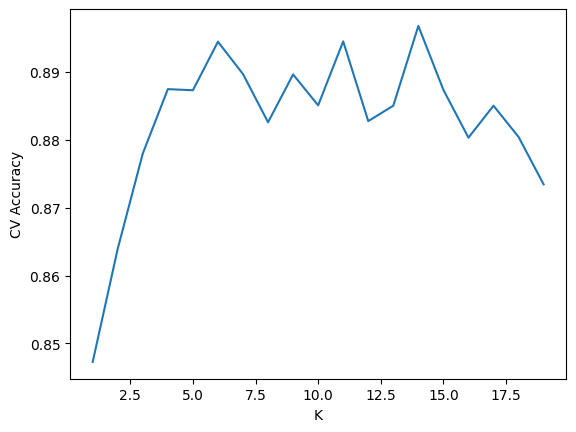

In [20]:
# plot accuracy for different 'k'
import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter
%matplotlib inline
plt.plot(range(1, 20), accList)
plt.xlabel('K')
plt.ylabel('CV Accuracy')
plt.show()


In [21]:
# validate with your test samples

# your code here
accList = []
k = 13
clf_knn = KNeighborsClassifier(n_neighbors=k, algorithm='auto')
scores = cross_val_score(clf_knn, X_train1, y_train1, cv=10)
score = scores.mean()
accList.append(score)
print(accList)
clf_knn.fit(X_train1, y_train1)
val_knn = test_predict(clf_knn, X_test1, y_test1)

[np.float64(0.8849944629014397)]
test accuracy for KNeighborsClassifier model is 0.916083916083916
test F-beta for KNeighborsClassifier model is 0.8791208791208791
------------------------------------------------------------------


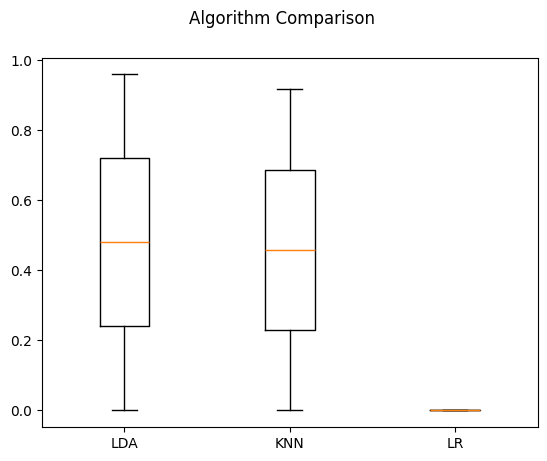

In [22]:
# Compare your algorithm accuracies
# Hint: please replace set values with --> val_KNN['acc_test']
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot([(0, val_LDA['acc_test']), (0, val_knn['acc_test']), (0, 0)])
ax.set_xticklabels(['LDA', 'KNN', 'LR'])
plt.show()


### Other evaluation metrics
More comprehensive giving all metrics instead of just accuracy

**TODO: Observe this for all classification methods and save them to a csv/json file**

An example is done for you.

In [23]:
# Find precision, recall, f1-score and a confusion matrix
from sklearn import metrics
predicted = clf.predict(X_test1)
print('test classification result for %s:\n%s\n'
      % (clf.__class__.__name__, metrics.classification_report(y_test1, predicted)))
print('test confusion matrix:\n%s' %
      metrics.confusion_matrix(y_test1, predicted))

y_test1
predicted.shape

predicted1 = clf_knn.predict(X_test1)
print('test classification result for %s:\n%s\n'
      % (clf_knn.__class__.__name__, metrics.classification_report(y_test1, predicted1)))
print('test confusion matrix:\n%s' %
      metrics.confusion_matrix(y_test1, predicted1))

y_test1
predicted1.shape


test classification result for LinearDiscriminantAnalysis:
              precision    recall  f1-score   support

           0       0.95      0.99      0.97        90
           1       0.98      0.91      0.94        53

    accuracy                           0.96       143
   macro avg       0.96      0.95      0.95       143
weighted avg       0.96      0.96      0.96       143


test confusion matrix:
[[89  1]
 [ 5 48]]
test classification result for KNeighborsClassifier:
              precision    recall  f1-score   support

           0       0.94      0.92      0.93        90
           1       0.87      0.91      0.89        53

    accuracy                           0.92       143
   macro avg       0.91      0.91      0.91       143
weighted avg       0.92      0.92      0.92       143


test confusion matrix:
[[83  7]
 [ 5 48]]


(143,)

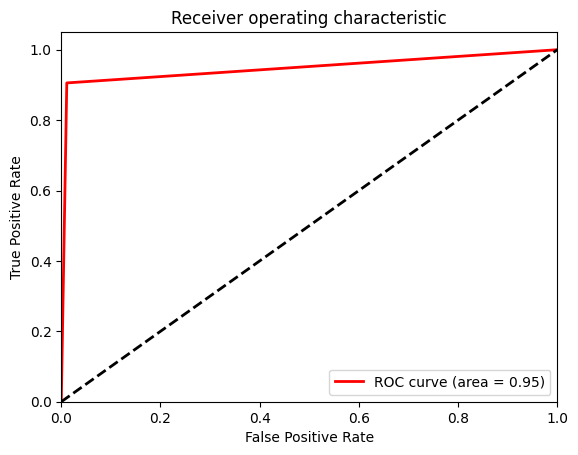

In [24]:
from sklearn.metrics import roc_curve, auc
# Compute ROC curve and ROC area
y_test1 = y_test1.reshape(y_test1.shape[0], 1)
predicted = predicted.reshape(predicted.shape[0], 1)
fpr, tpr, thresholds = metrics.roc_curve(y_test1, predicted)
roc_auc = auc(fpr, tpr)

# plot ROC curve
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='red', lw=lw,
         label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='black', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc='lower right')
plt.show()


## Supervised learning (contd...)
    Classification of COVID-19 cancer dataset 

- **Decision tree:** Decision tree builds classification or regression models in the form of a tree structure. It breaks down a dataset into smaller and smaller subsets while at the same time an associated decision tree is incrementally developed. ID3 algorithm uses *entropy* to calculate the homogeneity of a sample.

- **Naïve Bayes:** a family of simple "probabilistic classifiers" based on applying Bayes' theorem with strong (naïve) independence assumptions between the features. 

- **SVM:** constructs a hyperplane in multidimensional space to separate different classes. SVM generates optimal hyperplane in an iterative manner, which is used to minimize an error. 

- **Random forest:** a meta estimator that fits a number of decision tree classifiers on various sub-samples of the dataset and uses averaging to improve the predictive accuracy and control over-fitting.

*Disclaimer: Most definitions has been taken from scikit-learn webpages and Wikipedia.*

In [25]:
# [3] Decision tree

from sklearn import tree
clf_tree = tree.DecisionTreeClassifier()
clf_tree = clf_tree.fit(X_train1, y_train1)

print(
    f'Accuracy of decision tree on training set: {clf_tree.score(X_train1, y_train1):.2f}')


Accuracy of decision tree on training set: 1.00


In [26]:
# test, compute accuracy on test data
val_DT = test_predict(clf_tree, X_test1, y_test1)


test accuracy for DecisionTreeClassifier model is 0.951048951048951
test F-beta for DecisionTreeClassifier model is 0.9486166007905138
------------------------------------------------------------------


In [27]:
# For visualization of decision tree
data.info()
data.keys()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 26 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   diagnosis                569 non-null    object 
 1   radius_mean              569 non-null    float64
 2   texture_mean             569 non-null    float64
 3   smoothness_mean          569 non-null    float64
 4   compactness_mean         569 non-null    float64
 5   concavity_mean           569 non-null    float64
 6   concave points_mean      569 non-null    float64
 7   symmetry_mean            569 non-null    float64
 8   fractal_dimension_mean   569 non-null    float64
 9   radius_se                569 non-null    float64
 10  texture_se               569 non-null    float64
 11  perimeter_se             569 non-null    float64
 12  area_se                  569 non-null    float64
 13  smoothness_se            569 non-null    float64
 14  compactness_se           5

Index(['diagnosis', 'radius_mean', 'texture_mean', 'smoothness_mean',
       'compactness_mean', 'concavity_mean', 'concave points_mean',
       'symmetry_mean', 'fractal_dimension_mean', 'radius_se', 'texture_se',
       'perimeter_se', 'area_se', 'smoothness_se', 'compactness_se',
       'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'texture_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

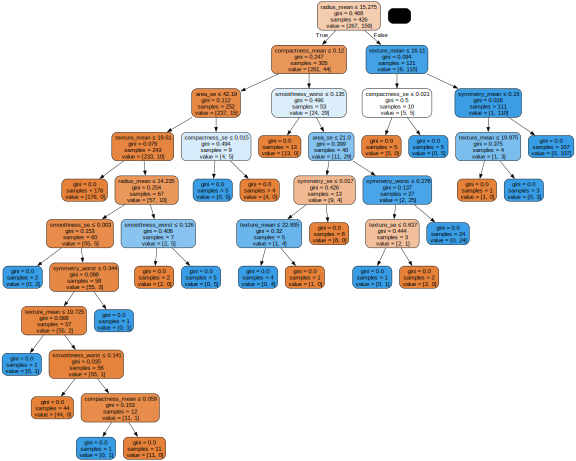

In [32]:
# uncomment below if the package is missing
#!pip install graphviz
#!pip install pydotplus
import graphviz
import pydotplus

dot_data = tree.export_graphviz(clf_tree, out_file=None,
                                feature_names=['radius_mean', 'texture_mean',
                                               'smoothness_mean', 'compactness_mean',
                                               'symmetry_mean', 'fractal_dimension_mean',
                                                'texture_se', 'area_se', 'smoothness_se',
                                               'compactness_se', 'symmetry_se',
                                               'fractal_dimension_se',
                                               'smoothness_worst',
                                               'symmetry_worst', 'fractal_dimension_worst'], filled=True, rounded=True,
                                special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data)
graph.set_size('"8,8!"')
gvz_graph = graphviz.Source(graph.to_string())

gvz_graph



### Use Naïve Bayes classifier and observe the accuracy

In [41]:
# your code here!
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
y_pred = gnb.fit(X_train1, y_train1).predict(X_test1)
y_test2 = y_test1.flatten()
print("Number of mislabeled points out of a total %d points : %d"
      % (X_test1.shape[0], (y_test2 != y_pred).sum()))



Number of mislabeled points out of a total 143 points : 14


Double-click __here__ for the solution.
<!-- Your answer is below:
from sklearn.naive_bayes import GaussianNB
nbclf = GaussianNB().fit(X_train1, y_train1)
predicted = nbclf.predict(X_test1)
print('Breast cancer dataset')
print('Accuracy of GaussianNB classifier on training set: {:.2f}'.format(nbclf.score(X_train1, y_train1)))
print('Accuracy of GaussianNB classifier on test set: {:.2f}'.format(nbclf.score(X_test1, y_test1)))
-->

### Implement SVM 

In [52]:
# your code here
from sklearn import svm
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
svmpredict= make_pipeline(StandardScaler(), SVC(gamma='auto'))
svmpredict.fit(X_train1, y_train1)
y_pred1 = svmpredict.predict(X_test1)

print("Number of mislabeled points out of a total %d points : %d"
      % (X_test1.shape[0], (y_test2 != y_pred1).sum()))

Number of mislabeled points out of a total 143 points : 8


<h3>Well done on completing this lesson!</h3>

If there is any time remaining...

**COVID-19 Prediction Challenge**

Your next task is to develop a machine learning model to predict positive COVID-19 test results using the dataset provided on Canvas. Your focus will be on achieving the highest accuracy on the test set.

*Tasks:*
- Build a Predictive Model: Utilize the dataset to train a model that can predict a positive COVID result.
- Prepare a Brief Presentation: Summarize your method, including your approach to the data, model choice, and any challenges faced.
- Submit Predictions: Provide your test set predictions for evaluation. 


Any comments or feedback, please send to [Thalia Seale](mailto:thalia.seale@eng.ox.ac.uk).